<a href="https://colab.research.google.com/github/Sharon-Faith/rango-proj/blob/data_prep_and_eda/data_prep_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **INTRODUCTION**

## **Overview**

Heart/cardiovascular diseases are a leading cause of death globally. Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. Some risk factors for cvds cannot be controlled, like age or genetic factors, but lifestyle (diet, tobacco use etc) can play a major role in increasing the risk because of how various body systems are affected. The world health organization reports that in 2019, about 32% of global deaths were caused by heart diseases. These statistics highlight why combating cardiovascular disease should be prioritized.

## **Defining our question**

Determining whether or not the patient has heart disease 

## **Metrics for success**

* Visualising the relationships between the presence/absence of heart disease and various clinical features such as age, cholesterol level, resting ecg results etc.
* Building a model that can determine whether someone has heart disease or not.
* Identifying the top features influencing the presence/absence of heart disease.


## **Understanding context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease

## **Recording experimental design**

*   Determine the main objectives
*   Load and preview the dataset.
*   Understand the data.
*   Prepare the dataset - Identify outliers, anomalies, duplicates, missing values, and determine how deal with them etc.
*    Carry out univariate analysis, bivariate analysis, and modelling.
*   Challenge the solution.
*   Conclusion and recommendations

## **Relevance of data**

The provided data was appropriate for descriptive and  classification analysis that was needed.



## **Term Explanations**

**Electrocardiogram (ECG)**
* A test that can be used to check the heart's rhythm and electrical activity
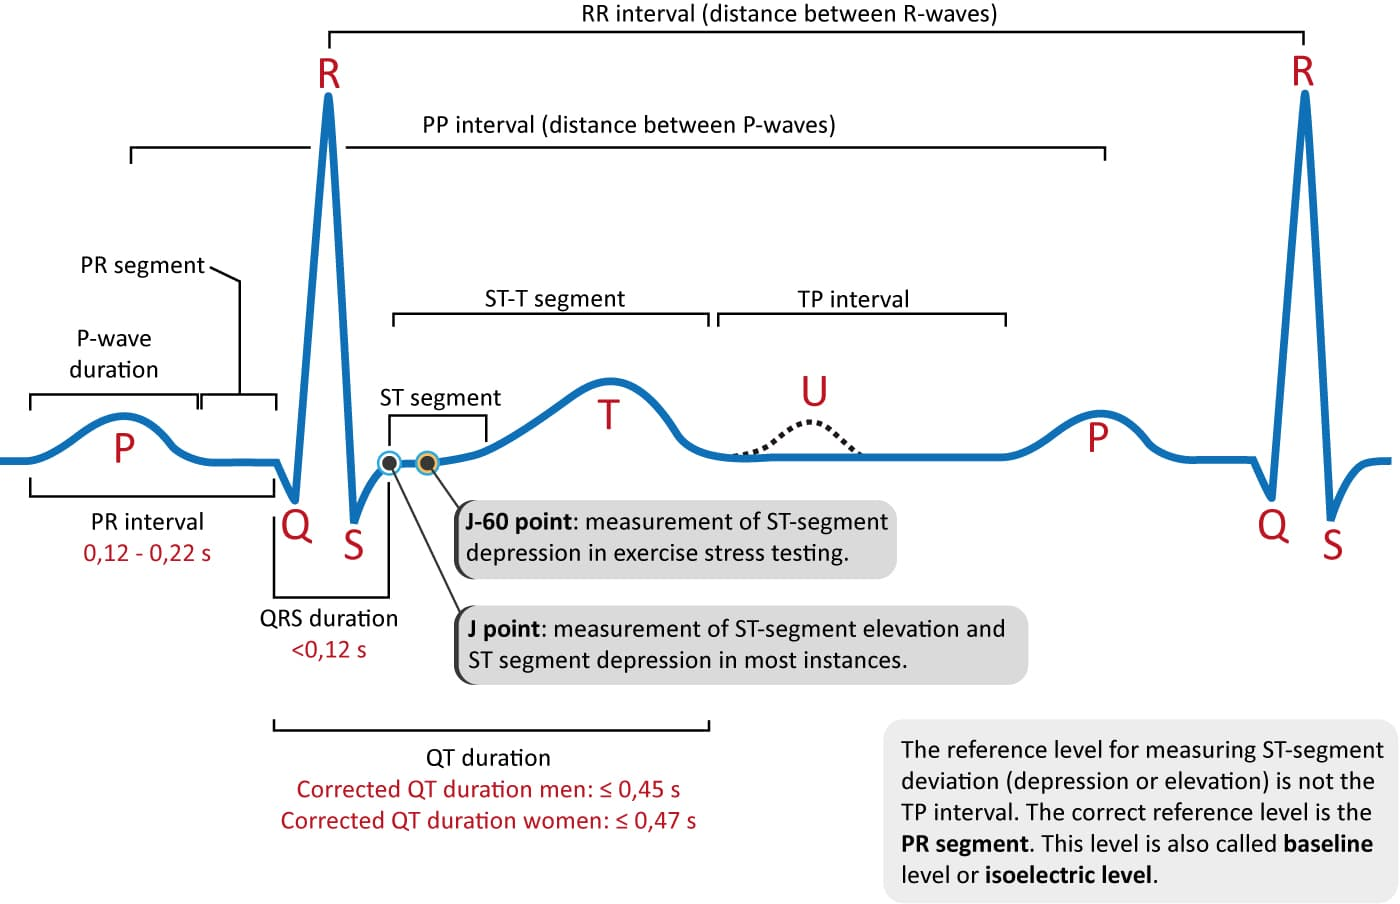

* P - wave: atrial depolarization (initiates atrial contraction)
* QRS complex: represents ventricular depolarization (initiates contraction of ventricles)
* T-wave: ventricular repolarization ( initiates ventricular relaxation)
* ST segment:  portion of the ECG from the end of the QRS complex to the beginning of the T wave. The ST segment normally remains isoelectric

**Angina**
* Type of chest pain caused by reduced blood flow to the heart
* The most common cause of reduced blood flow to the heart muscle is coronary artery disease (CAD).

* Typical/classic angina refers to substernal chest pain or discomfort that is (2) Provoked by exertion or emotional stress and (3) relieved by rest or nitroglycerine (or both).
* Atypical/probable anginal chest pain applies when 2 out of 3 criteria of classic angina are present.
* Non anginal pain -recurring pain in your chest — typically, behind your breast bone and near your heart — that is not related to your heart.
* Asymptomatic- temporary alteration in blood flow through the heart  in the absence of chest pain or the usual anginal equivalents.

**ST slope**
* Slope of the peak exercise ST segment.
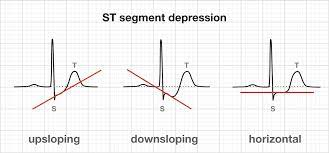

Normal ST segment during exercise slopes sharply upwards.

**Oldpeak**
* ST depression induced by exercise relative to rest


# **DATA LOADING**

## **Importing our libraries**

In [ ]:
import pandas              as pd
import numpy               as np
import seaborn             as sns
import matplotlib.pyplot   as plt
import matplotlib
import scipy as sp
# A grid layout to place subplots within a figure.
import matplotlib.gridspec as gridspec


import warnings
warnings.filterwarnings('ignore')


import pandas_profiling as pp

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error,  r2_score 
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [ ]:
def settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [ ]:
settings()

Populating the interactive namespace from numpy and matplotlib


## **Loading Data**

In [ ]:
#reading csv file

df= pd.read_csv('heart.csv')

In [ ]:
#previewing top rows
df.head(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1


In [ ]:
#previewing bottom 4 rows
df.tail(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
# checking for the dimentionality of our dataset
df.shape

#our dataset has 12 features and  rows 918

(918, 12)

In [ ]:
#Checking for more information about our dataset in terms of datatypes,null etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#column names of the our dataset
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
#converting the columns to lowercase and removing  spaces
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [ ]:
# Checking the number of unique values in the  dataset columns 



for column in df.columns:
  print(df[column].nunique())
  print(column)
  # print(results[column].unique())
  print('\n')

50
age


2
sex


4
chestpaintype


67
restingbp


222
cholesterol


2
fastingbs


3
restingecg


119
maxhr


2
exerciseangina


53
oldpeak


3
st_slope


2
heartdisease




# **DATA CLEANING**

***Missing values***

In [ ]:
#checking for missing values
df.isnull().sum()


#no null values in dataset

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

***Duplicates***

In [ ]:
# Checking for duplicates
df.duplicated().sum()

#no duplicates in our dataset

0

***Outliers***

In [ ]:
#Outliers
# checking for outliers using IQR Scores
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)).sum()

,age,chestpaintype,cholesterol,exerciseangina,fastingbs,heartdisease,maxhr,oldpeak,restingbp,restingecg,sex,st_slope
0,False,False,True,False,True,False,False,True,True,False,False,False
1,False,False,True,False,True,False,False,True,True,False,False,False
2,False,False,True,False,True,False,False,True,True,False,False,False
3,False,False,True,False,True,False,False,True,True,False,False,False
4,False,False,True,False,True,False,False,True,True,False,False,False
5,False,False,True,False,True,False,False,True,True,False,False,False
6,False,False,True,False,True,False,False,True,True,False,False,False
7,False,False,True,False,True,False,False,True,True,False,False,False
8,False,False,True,False,True,False,False,True,True,False,False,False
9,False,False,True,False,True,False,False,True,True,False,False,False


In [ ]:
df.head(1)

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


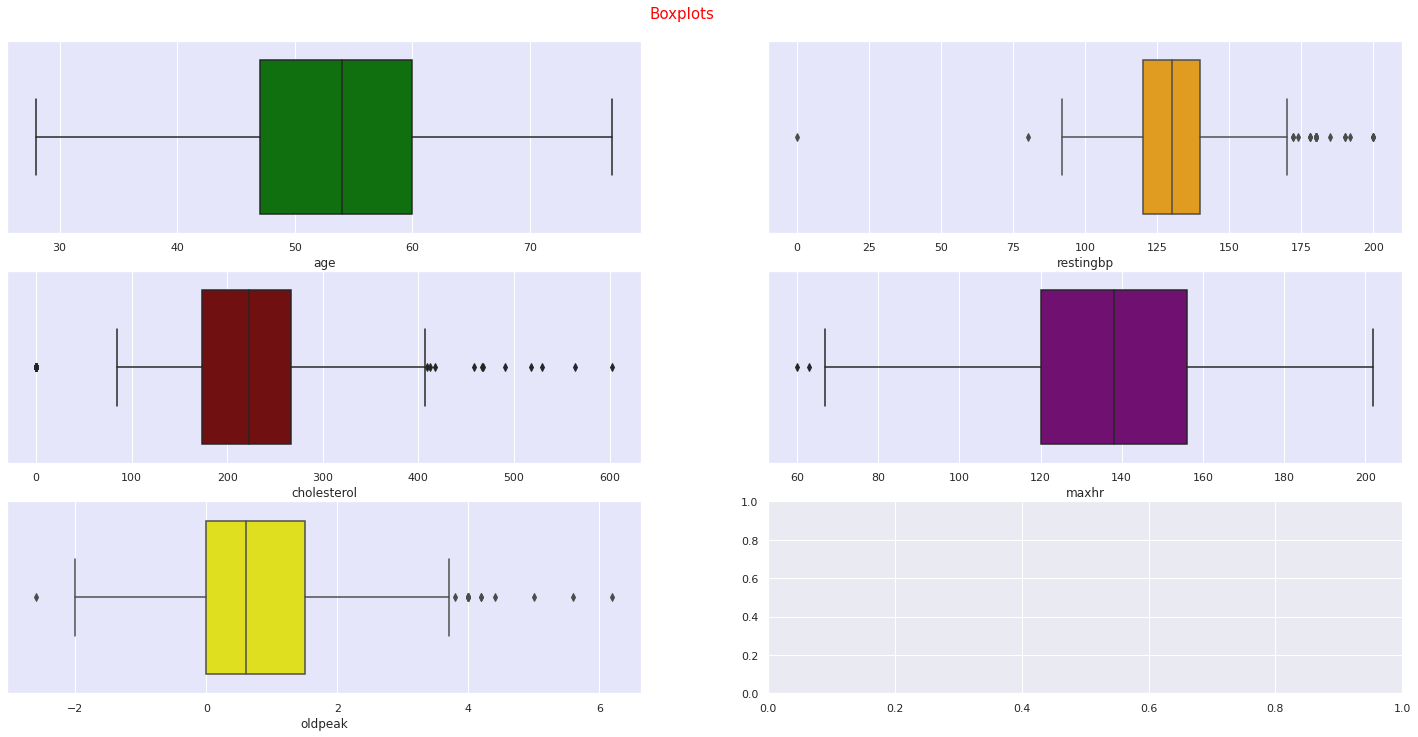

In [ ]:
#visualizing the above outiers

# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['age','restingbp','cholesterol','maxhr','oldpeak']
colors = ['green','orange','maroon','purple','yellow']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2)
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'red')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.boxplot(df[column], ax = ax, color = color)
  ax.set_facecolor('lavender')

We have outliers in the features oldpeak, cholesterol and restingbp, and few in max heart rate, most of which are likely due to natural variability in our data depending on the health status of an individual thus we will not be dropping most them. However, the observations with resting blood pressure as 0 and cholesterol levels as 0 call for further investigation.

In [ ]:
#resting blood pressure of 0, serum cholesterol level of 0 .. might be missing values.

In [ ]:
#We will drop the observation because blood pressure of 0 is death/near-death so 0 may be
#representing a missing value
df[df['restingbp'] == 0]

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
#dropping observation above
df.drop(index=449, inplace=True)

In [ ]:
#serum cholesterol levels of 0 mg/dL are also highly unlikely to be valid. may be representing missing
#measurements
#We will drop the observations
len(df[df['cholesterol'] == 0])

171

In [ ]:
#dropping above observations
df = df[df['cholesterol'] != 0].copy()

In [ ]:
#checking the shape after dropping some outliers
df.shape

(746, 12)

In [ ]:
#resetting the index to be chronological
df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

In [ ]:
#previewing
print(df.head())
print(df.tail())

   age sex chestpaintype  restingbp  cholesterol  fastingbs restingecg  maxhr exerciseangina  oldpeak st_slope  heartdisease
0   40   M           ATA        140          289          0     Normal    172              N      0.0       Up             0
1   49   F           NAP        160          180          0     Normal    156              N      1.0     Flat             1
2   37   M           ATA        130          283          0         ST     98              N      0.0       Up             0
3   48   F           ASY        138          214          0     Normal    108              Y      1.5     Flat             1
4   54   M           NAP        150          195          0     Normal    122              N      0.0       Up             0
     age sex chestpaintype  restingbp  cholesterol  fastingbs restingecg  maxhr exerciseangina  oldpeak st_slope  heartdisease
741   45   M            TA        110          264          0     Normal    132              N      1.2     Flat           

In [ ]:
#checking for anomalies in categorical columns
cols = ['sex', 'chestpaintype', 'fastingbs',
       'restingecg', 'exerciseangina', 'st_slope',
       'heartdisease']
for column in cols:
  print(column)
  print(df[column].unique())
  
  
  print('\n')

#no anomalous values observed

sex
['M' 'F']


chestpaintype
['ATA' 'NAP' 'ASY' 'TA']


fastingbs
[0 1]


restingecg
['Normal' 'ST' 'LVH']


exerciseangina
['N' 'Y']


st_slope
['Up' 'Flat' 'Down']


heartdisease
[0 1]




In [ ]:
#saving our clean dataset
df.to_csv('clean-heart',index=False)

# **UNIVARIATE ANALYSIS**

In [ ]:
#general statistical summaries of the numerical variables
df.drop(columns=['fastingbs', 'heartdisease'], axis=1).describe()

,age,restingbp,cholesterol,maxhr,oldpeak
count,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,140.226542,0.901609
std,9.505888,17.282750,59.153524,24.524107,1.072861
min,28.000000,92.000000,85.000000,69.000000,-0.100000
25%,46.000000,120.000000,207.250000,122.000000,0.000000
50%,54.000000,130.000000,237.000000,140.000000,0.500000
75%,59.000000,140.000000,275.000000,160.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


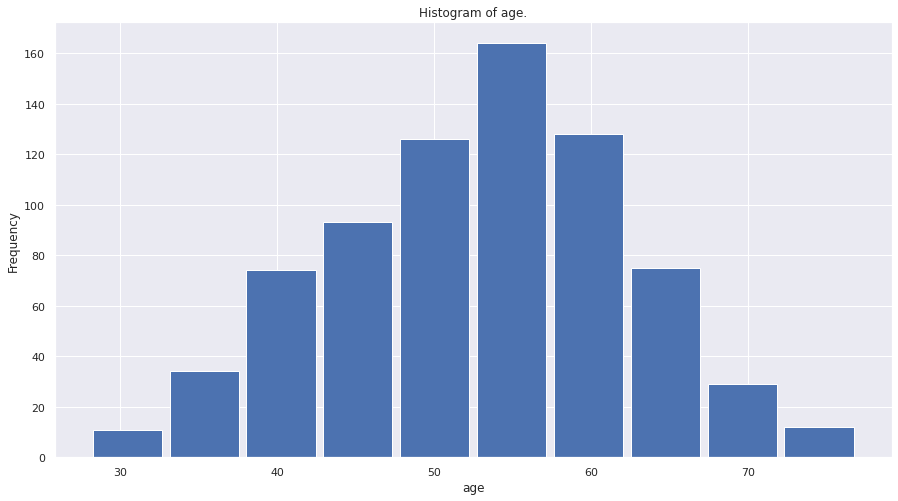

Most patients were aged between 52 and 57



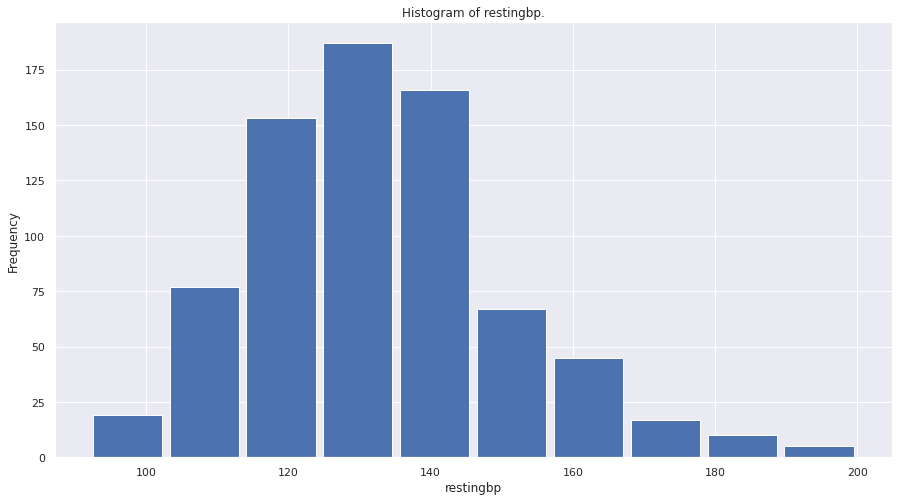

Most restingbp values fell within the range of 124.4 to 135.2



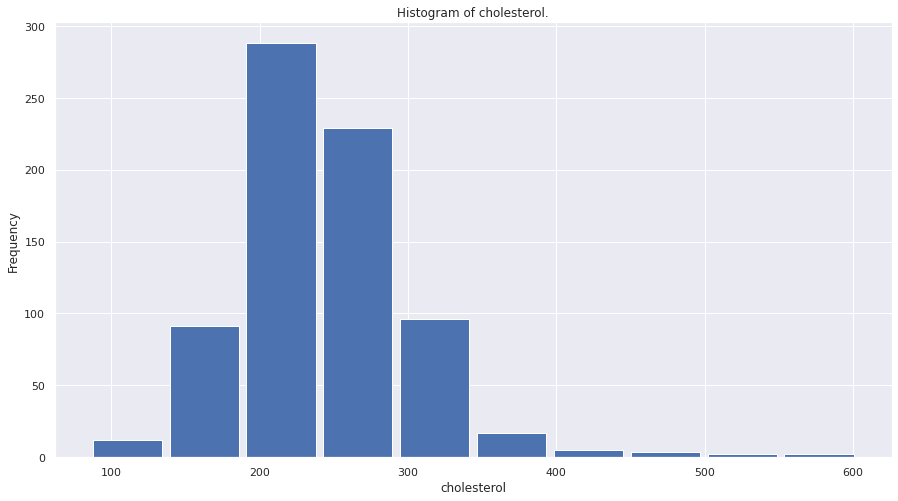

Most cholesterol values fell within the range of 188.6 to 240.4



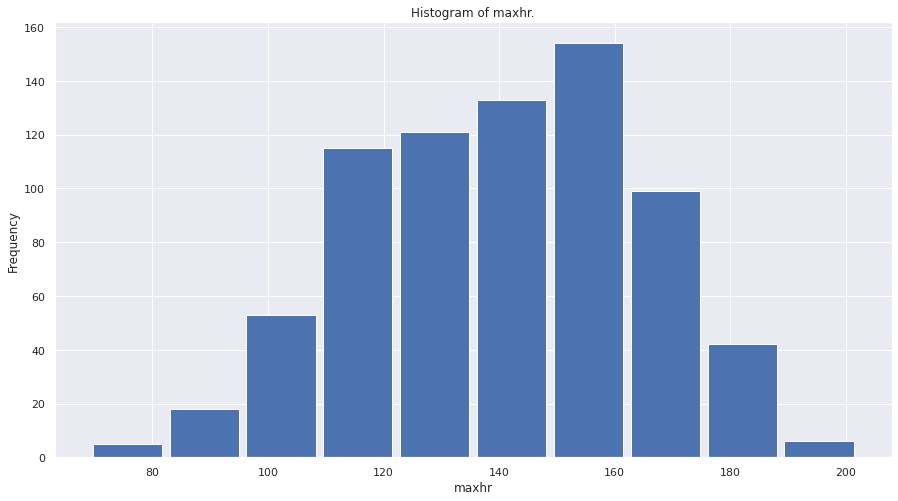

Most maxhr values fell within the range of 148.8 to 162.1



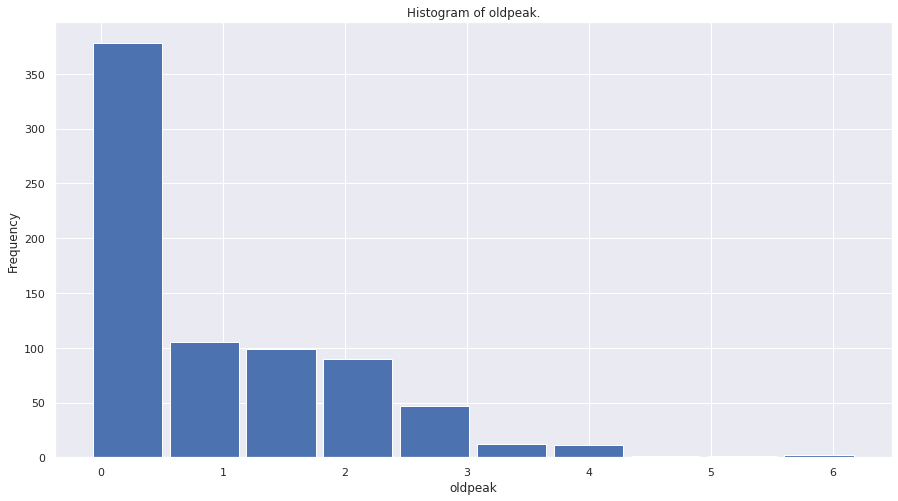

Most oldpeak values fell within the range of -0.1 to 0.53



In [ ]:
#plotting histograms for continuous variables
cols = ['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']
for col in cols:
  (n, bins, patches) = plt.hist(df[col], bins= 10, rwidth=0.9)

  plt.title(f'Histogram of {col}.')
  plt.xlabel(f'{col}')
  plt.ylabel('Frequency')
  plt.gcf().set_size_inches(15,8)
  plt.show()
  #creating a dataframe with the values of bin edges
  df_hist = pd.DataFrame(data=n, columns=['bin_values'])
  df_hist['left_bin_edge'] = bins[0:-1]
  df_hist
  last = {
    'bin_values': 0,
    'left_bin_edge': bins[-1]
  }
  df_hist = df_hist.append(last, ignore_index=True)
  #looping through dataframe above to identify bins with most frequency and the respective bin edges
  #to print observations below histogram 
  for i in df_hist.index:
    if df_hist.loc[i, 'bin_values'] == df_hist['bin_values'].max():
      left_edge =  df_hist.loc[i, 'left_bin_edge']
      right_lim = df_hist.loc[i+1, 'left_bin_edge']
      if col == 'age':
        print(f'Most patients were aged between { int(left_edge)} and {int(right_lim)}')

      else:
        print(f'Most {col} values fell within the range of { round(left_edge,2)} to {round(right_lim,2)}')

  print('')

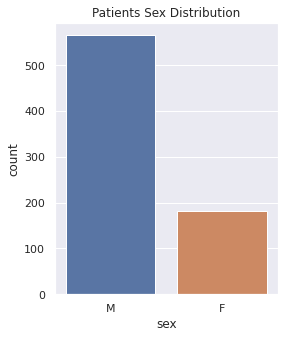

In [ ]:
#countplots of categorical: Sex distribution
plt.figure(figsize=(4, 5))
sns.countplot(df.sex, order = df.sex.value_counts().index)
plt.title("Patients Sex Distribution")
plt.show()

#from our plot, there were more males compared to females

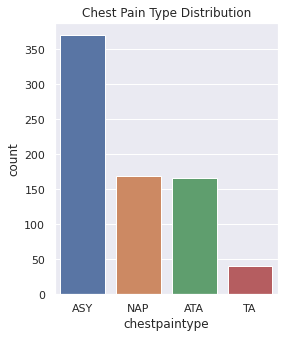

In [ ]:
#countplots of categorical: ChestPain Type Distribution
plt.figure(figsize=(4, 5))
sns.countplot(df.chestpaintype, order = df.chestpaintype.value_counts().index)
plt.title("Chest Pain Type Distribution")
plt.show()

#those tested, few people experienced Typical Angina(TA) type of Chest pain. While a Majority expereinced Asymptomatic pain(ASY) 

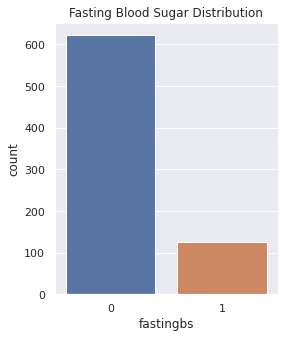

In [ ]:
#countplots of categorical: Fasting Blood Sugar
plt.figure(figsize=(4, 5))
sns.countplot(df.fastingbs, order = df.fastingbs.value_counts().index)
plt.title("Fasting Blood Sugar Distribution")
plt.show()

#most of the people tested had no/low blood sugar levels while a few had a higher levels.

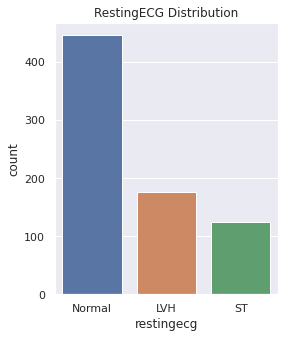

In [ ]:
#countplots of categorical: RestingECG
plt.figure(figsize=(4, 5))
sns.countplot(df.restingecg, order = df.restingecg.value_counts().index)
plt.title("RestingECG Distribution")
plt.show()

#from the plot, many people have a Normal Elctrical Activity of the heart when resting. 

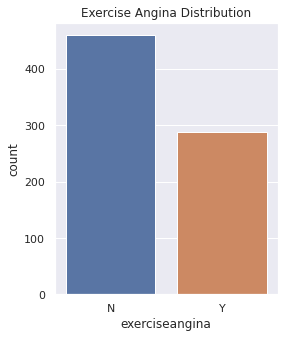

In [ ]:
#countplots of categorical: ExerciseAngina
plt.figure(figsize=(4, 5))
sns.countplot(df.exerciseangina, order = df.exerciseangina.value_counts().index)
plt.title("Exercise Angina Distribution")
plt.show()

#most people from the dataset, expereinced no pain when exercising. while a fewer number - between 200 to 300 expereinced some pain.

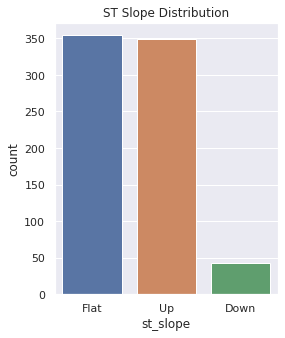

In [ ]:
#countplots of categorical: ST Slope
plt.figure(figsize=(4, 5))
sns.countplot(df.st_slope, order = df.st_slope.value_counts().index)
plt.title("ST Slope Distribution")
plt.show()

#from the ST Slope, a majority indicate a Flat slope curve, followed closely by an Up side trending curve and less than 50 people had a down slope.

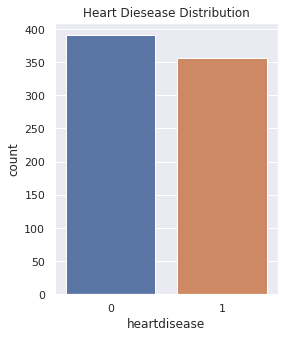

In [ ]:
#countplots of categorical: Heart Desease
plt.figure(figsize=(4, 5))
sns.countplot(df.heartdisease, order = df.heartdisease.value_counts().index)
plt.title("Heart Diesease Distribution")
plt.show()

#Now from our dataset, most of the people tested had no(0) Heart Disease.

#**BIVARIATE ANALYSIS**

In [ ]:
#target column is heart disease

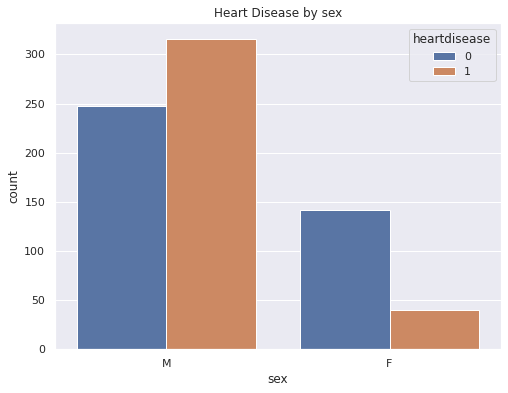

In [ ]:
#first plotting countplots of heart disease by categorical features:
#sex, ChestPainType, FastingBs, Resting ecg, Exercise angina, ST slope

#1. Sex
sns.countplot(x='sex', hue = 'heartdisease', data=df)
plt.title(f'Heart Disease by sex')
plt.gcf().set_size_inches(8, 6)
plt.show()

#most Males had heart disease, while in females, the majority had no heart disease.

most Males had heart disease, while in females, the majority had no heart disease.

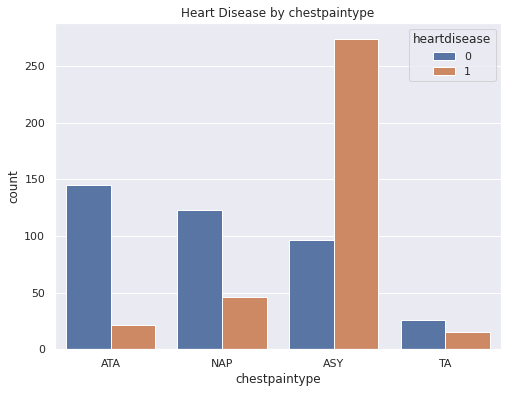

In [ ]:
#2. chestpaintype
sns.countplot(x='chestpaintype', hue = 'heartdisease', data=df)
plt.title(f'Heart Disease by chestpaintype')
plt.gcf().set_size_inches(8, 6)
plt.show()

#the plot shows that the majority experiencing asymptomatic pain had heart disease.

the majority experiencing asymptomatic pain had heart disease.

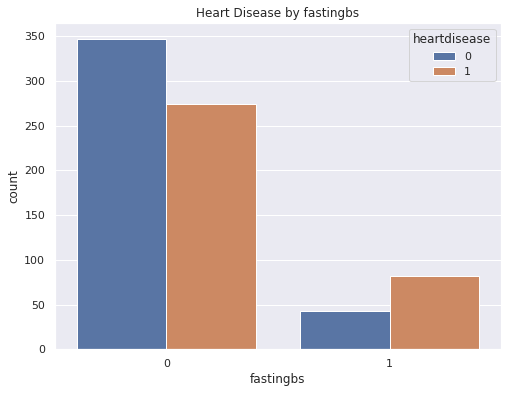

In [ ]:
#3. FastingBs
sns.countplot(x='fastingbs', hue = 'heartdisease', data=df)
plt.title(f'Heart Disease by fastingbs')
plt.gcf().set_size_inches(8, 6)
plt.show()

#1: if FastingBS > 120 mg/dl, 0: otherwise
#Majority of those with fasting blood sugar levels > 120 mg/dL had heart disease

1: if FastingBS > 120 mg/dl, 0: otherwise

Majority of those with fasting blood sugar levels > 120 mg/dL had heart disease

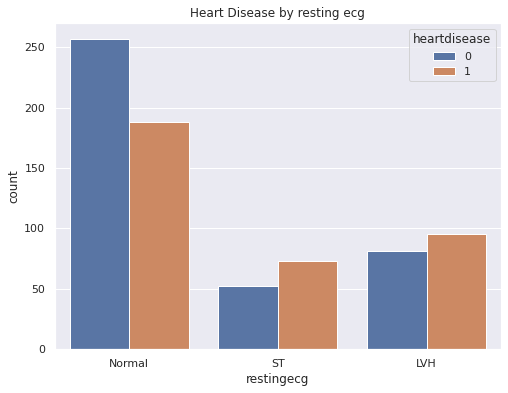

In [ ]:
#4. Resting ecg
sns.countplot(x='restingecg', hue = 'heartdisease', data=df)
plt.title(f'Heart Disease by resting ecg')
plt.gcf().set_size_inches(8, 6)
plt.show()

# Majority of those whose resting ecg results showed ST-T wave abnormality
# or probable or definite left ventricular hypertrophy had heart disease

Majority of those whose resting ecg results showed ST-T wave abnormality or probable/definite left ventricular hypertrophy had heart disease.

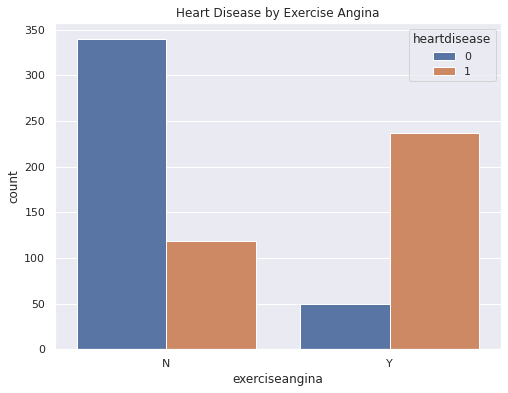

In [ ]:
#5. Exercise Angina
sns.countplot(x='exerciseangina', hue = 'heartdisease', data=df)
plt.title(f'Heart Disease by Exercise Angina')
plt.gcf().set_size_inches(8, 6)
plt.show()

#Majority of those who experiened eangina during exercise had heart disease

Majority of those who experienced angina induced by exercise had heart disease.

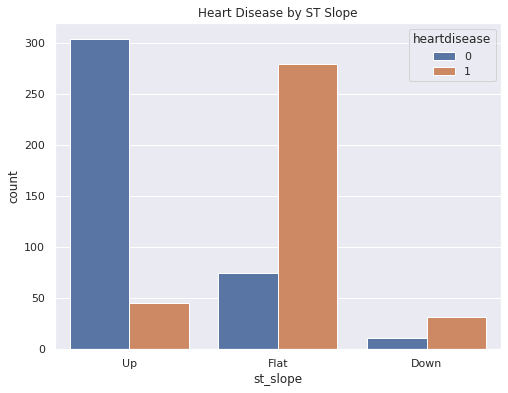

In [ ]:
#6. ST slope
sns.countplot(x='st_slope', hue = 'heartdisease', data=df)
plt.title(f'Heart Disease by ST Slope')
plt.gcf().set_size_inches(8, 6)
plt.show()

#Majority of those whose ST slope during peak exercise sloped down
#or was flat had heart disease

Majority of those whose ST slope during peak exercise sloped down or was flat had heart disease

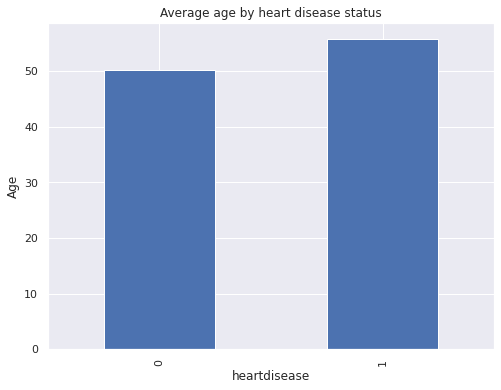

In [ ]:
#continuous
df.groupby(['heartdisease'])['age'].mean().plot.bar()
plt.title('Average age by heart disease status')
plt.ylabel('Age')
plt.gcf().set_size_inches(8, 6)
plt.show()

#the average age of those with heart disease was higher than the average age of those without heart disease

the average age of those with heart disease was higher than the average age of those without heart disease

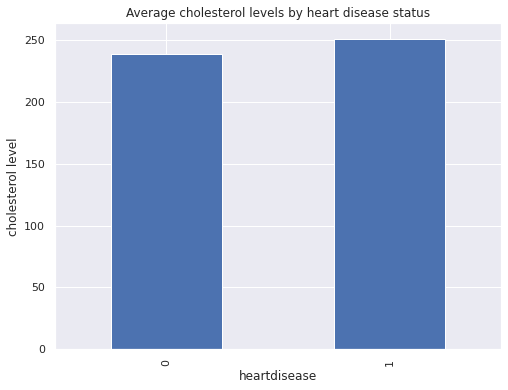

In [ ]:
df.groupby(['heartdisease'])['cholesterol'].mean().plot.bar()
plt.title('Average cholesterol levels by heart disease status')
plt.ylabel('cholesterol level')
plt.gcf().set_size_inches(8, 6)
plt.show()
#the average cholesterol levels of those with heart disease was higher than the average of those without heart disease

the average cholesterol levels of those with heart disease was higher than the average of those without heart disease

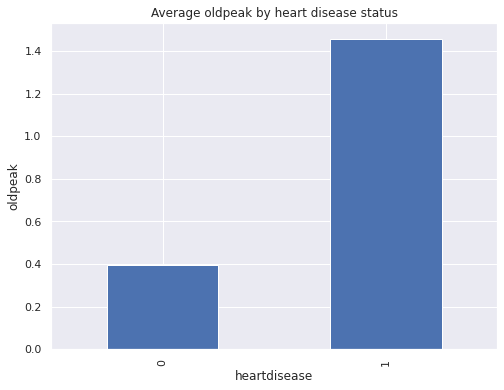

In [ ]:
df.groupby(['heartdisease'])['oldpeak'].mean().plot.bar()
plt.title('Average oldpeak by heart disease status')
plt.ylabel('oldpeak')
plt.gcf().set_size_inches(8, 6)
plt.show()
##the average old peak value (ST depression induced by exercise relative to rest) of those with heart disease was higher
# than the average of those without heart disease

The average old peak value (ST depression induced by exercise relative to rest) of those with heart disease was higher than the average of those without heart disease.

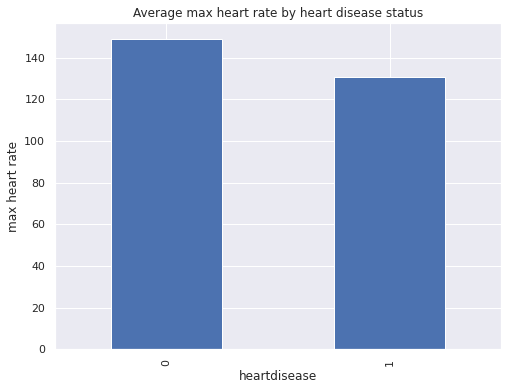

In [ ]:
df.groupby(['heartdisease'])['maxhr'].mean().plot.bar()
plt.title('Average max heart rate by heart disease status')
plt.ylabel('max heart rate')
plt.gcf().set_size_inches(8, 6)
plt.show()
#the average max heart rate achieved of those with heart disease was lower 
#than the average of those without heart disease

The average max heart rate achieved of those with heart disease was lower than the average of those without heart disease

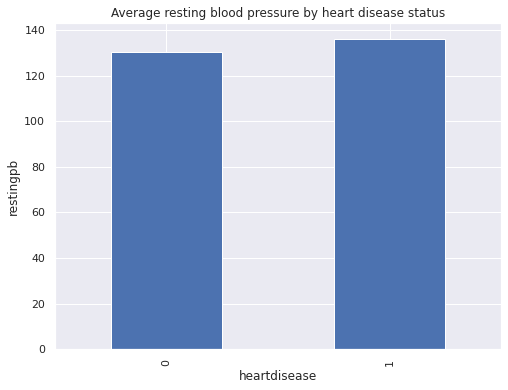

In [ ]:
df.groupby(['heartdisease'])['restingbp'].mean().plot.bar()
plt.title('Average resting blood pressure by heart disease status')
plt.ylabel('restingpb')
plt.gcf().set_size_inches(8, 6)
plt.show()
##the average resting blood pressure of those with heart disease was higher
# than the average of those without heart disease

The average resting blood pressure of those with heart disease was higher than the average of those without heart disease.

In [ ]:
# Encoding the categorical columns
#
cols=['sex', 'chestpaintype', 'restingecg', 'exerciseangina', 'st_slope']
le = LabelEncoder()
df_encoded=df.copy()
for col in cols:
  df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
# Confirming the changes

df_encoded.tail()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
741,45,1,3,110,264,0,1,132,0,1.2,1,1
742,68,1,0,144,193,1,1,141,0,3.4,1,1
743,57,1,0,130,131,0,1,115,1,1.2,1,1
744,57,0,1,130,236,0,0,174,0,0.0,1,1
745,38,1,2,138,175,0,1,173,0,0.0,2,0


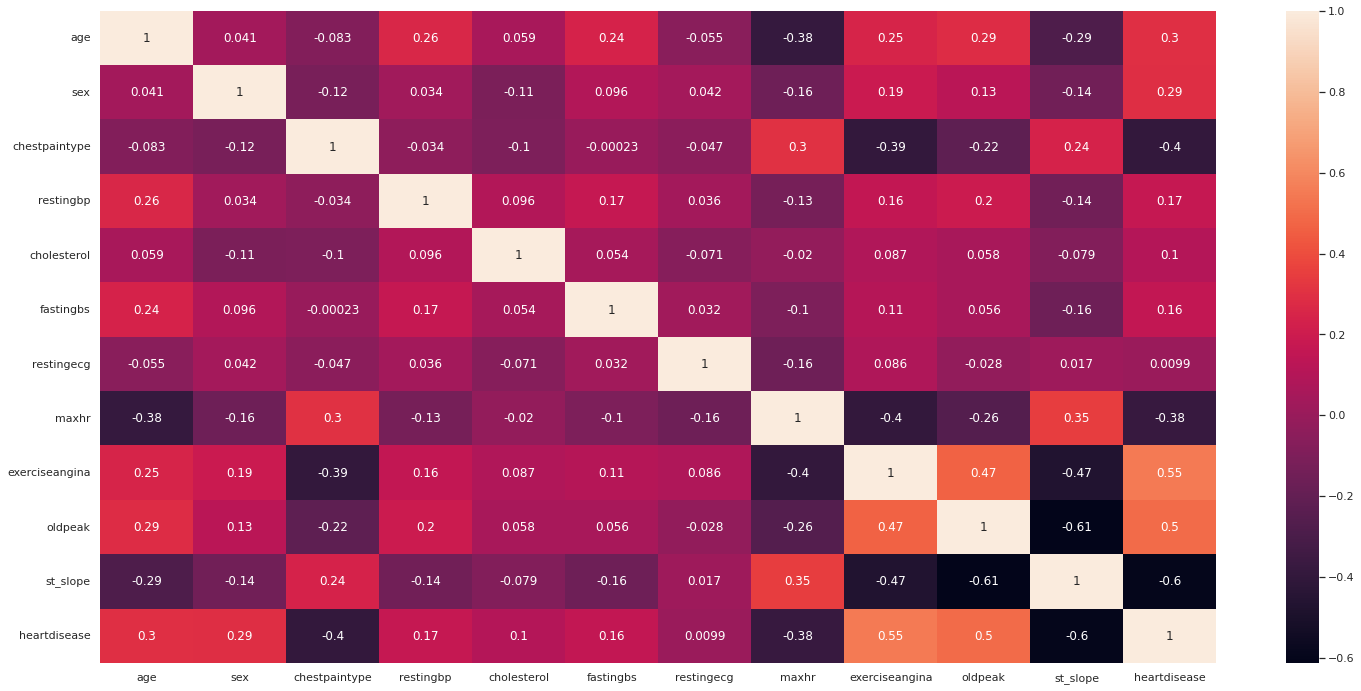

In [ ]:
#showing correlation on a heatmap

plt.figure()
sns.heatmap(df_encoded.corr(),annot=True)
plt.show()

Heart disease, the target column, appears to be most correlated to st_slope, exercise angina, oldpeak and chestpaintype in that order. Modelling will reveal more on the relationships